In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Exploratory Data Analysis** (EDA)

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


## **Univariate Analysis**

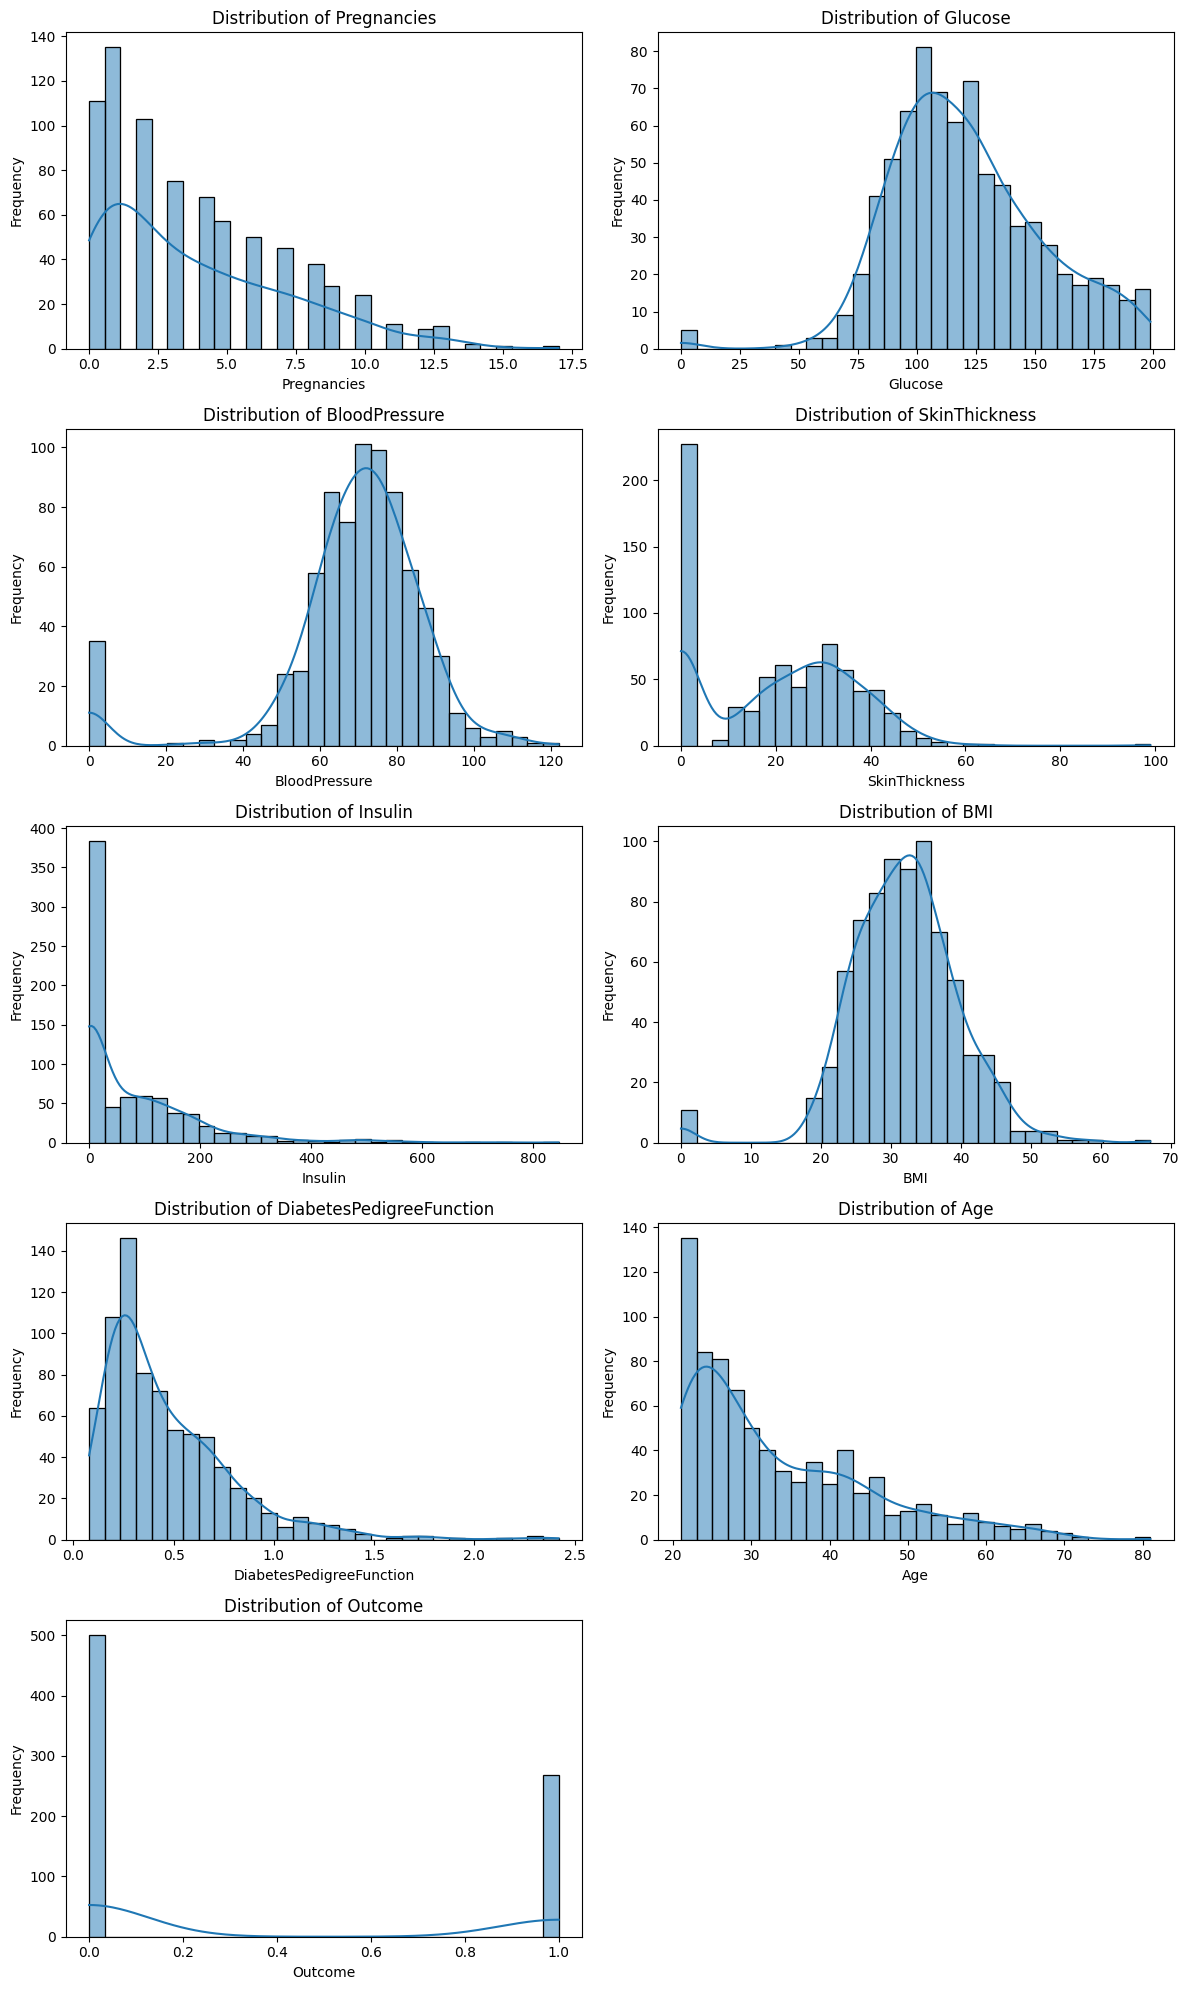

In [ ]:
# Select continuous variables
continuous_vars = df.select_dtypes(include='number').columns

# Set number of rows and columns for the subplots
n_cols = 2
n_rows = int(np.ceil(len(continuous_vars) / n_cols))

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily index

# Loop through the continuous variables and create a histogram for each
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

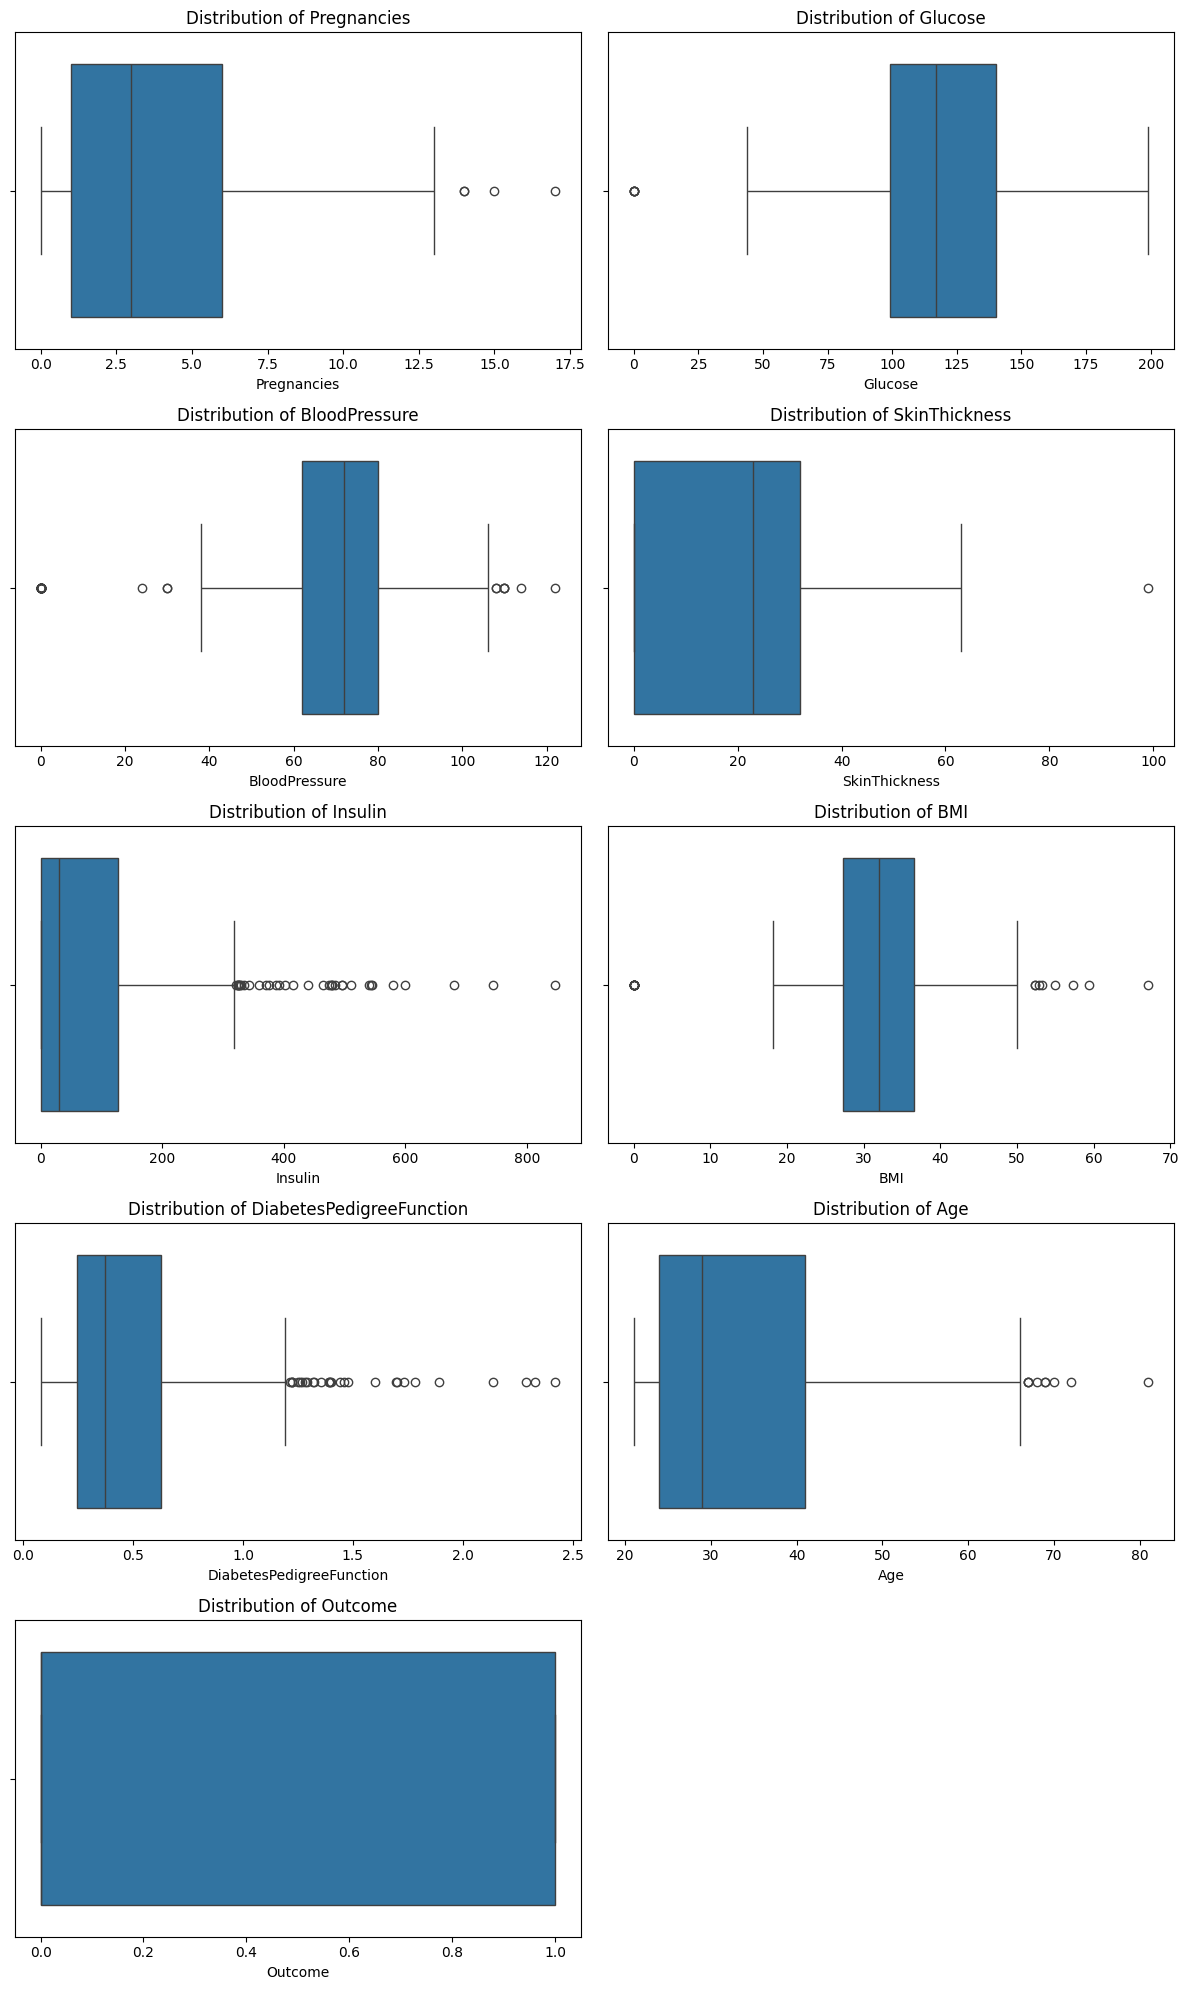

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select continuous variables
continuous_vars = df.select_dtypes(include='number').columns.tolist()

# Set number of rows and columns for the subplots
n_cols = 2
n_rows = int(np.ceil(len(continuous_vars) / n_cols))

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily index

# Loop through the continuous variables and create a horizontal boxplot for each
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=var, data=df, ax=axes[i])  # Switch to x-axis reference
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

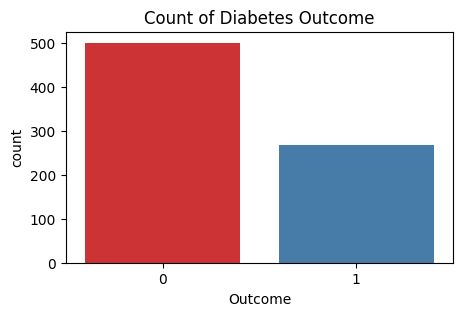

In [ ]:
# Set the figure size
plt.figure(figsize=(5, 3))

# Create a count plot with a specified color palette
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title('Count of Diabetes Outcome')
plt.show()

## **Bivariate Analysis**

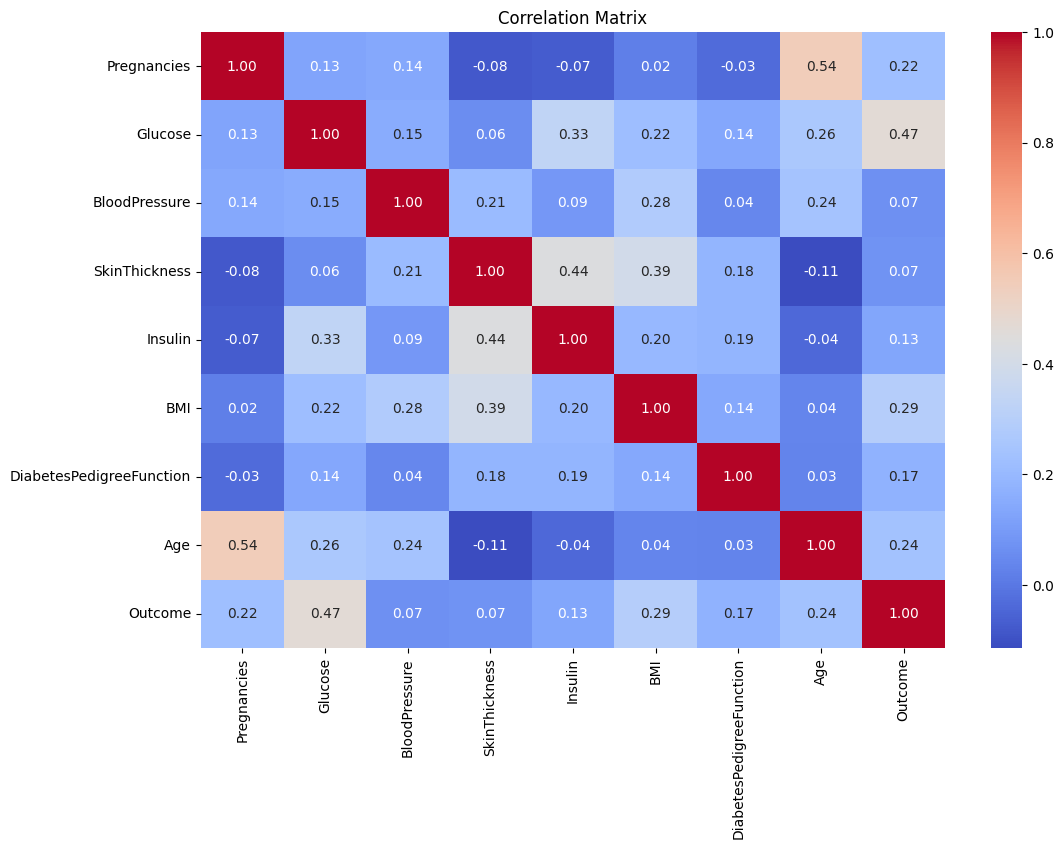

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Obervation :**
- `Glucose` shows the strongest positive correlation with the `Outcome` (diabetes diagnosis), with a correlation of **0.47**. This suggests that higher glucose levels are strongly associated with diabetes.

- `Age` has a strong positive correlation with `Pregnancies` (0.54). This indicates that older individuals in the dataset tend to have had more pregnancies.

- `BMI` has a moderate positive correlation with `Outcome` (0.29). Higher BMI values are moderately associated with an increased likelihood of diabetes.

- Variables like `BloodPressure`, `SkinThickness`, `Insulin`, and `DiabetesPedigreeFunction` have relatively weak correlations with `Outcome` (ranging between 0.07 and 0.17). These features may not be as influential in predicting diabetes directly.

- There is a moderate positive correlation between `Insulin` and `SkinThickness` (0.44). This could suggest that individuals with higher skin thickness measurements may also have elevated insulin levels.

- `Age` shows a weak correlation with `Outcome` (0.24), meaning that age has a modest effect on predicting diabetes in this dataset.

- `Age` and `Glucose` have a low positive correlation (0.26), showing that older individuals may have slightly higher glucose levels.

- `Insulin` and `Glucose` have a moderate positive correlation (0.33), suggesting a relationship between insulin and glucose levels.

#### Overall, `Glucose`, `BMI`, and `Age` seem to be key factors positively correlated with the likelihood of diabetes, while other features like `BloodPressure` and `SkinThickness` show weaker associations.

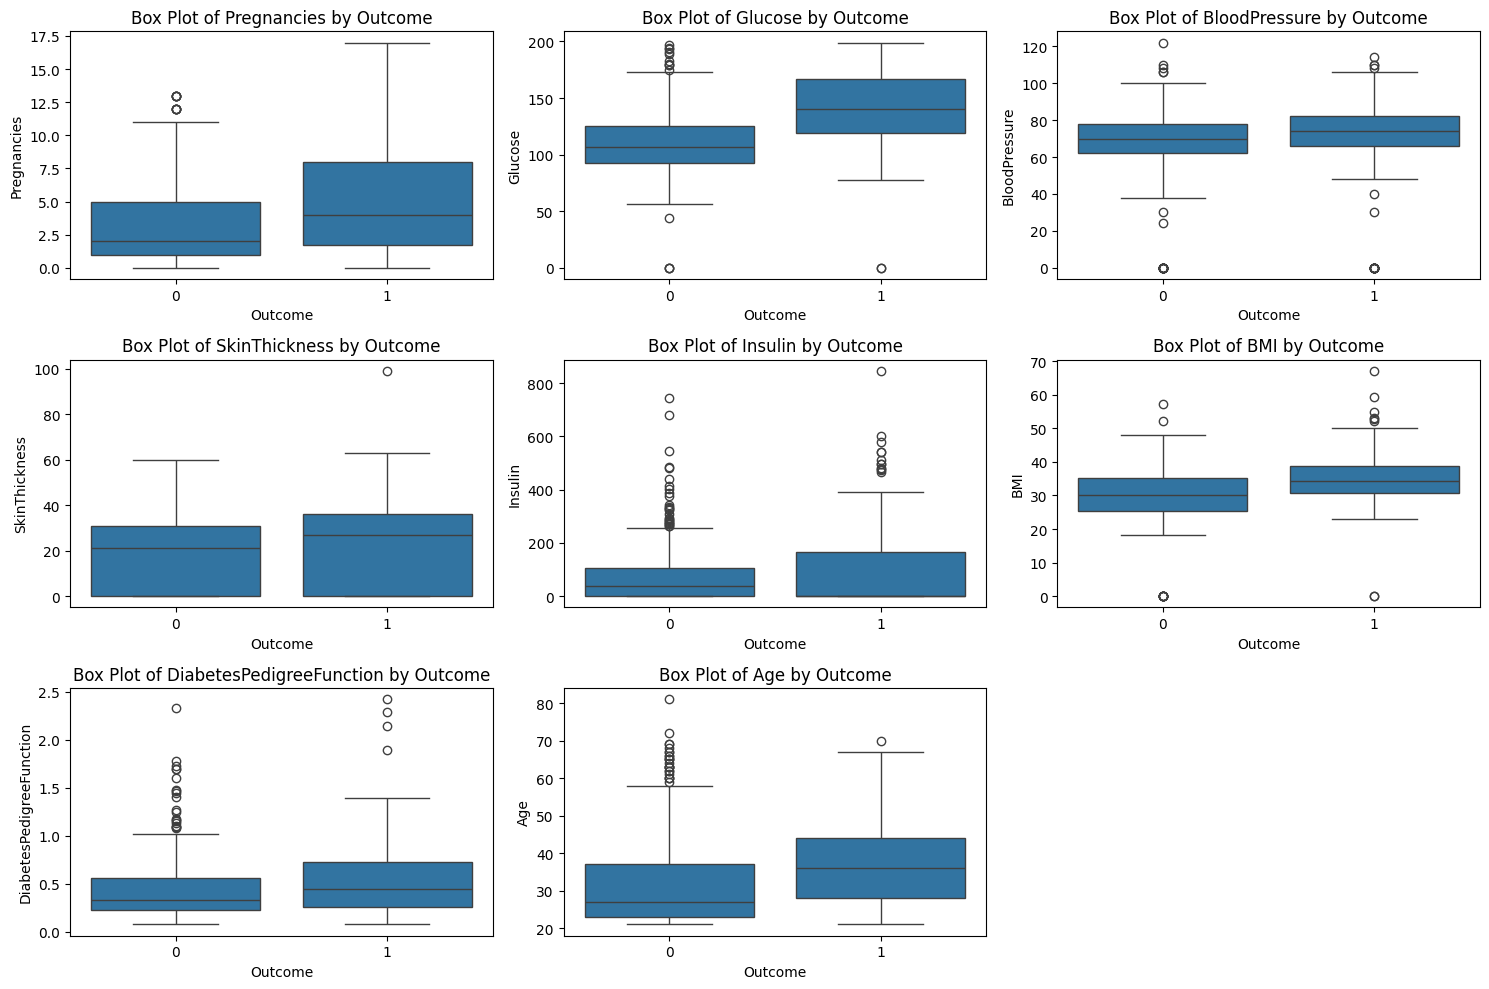

In [ ]:
# Distribution of Features
features = df.columns[:-1]  # Exclude 'Outcome' for distribution plots

# Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Outcome')
plt.tight_layout()
plt.show()

**Observation**

- Individuals with `Pregnancies` (Outcome = 1) tend to have more pregnancies. The median number of pregnancies is higher for those diagnosed with diabetes, suggesting a positive relationship between the number of pregnancies and the likelihood of developing diabetes.

- The `Glucose` levels are significantly higher in individuals with diabetes (Outcome = 1) compared to those without diabetes (Outcome = 0). This confirms that glucose levels are a key factor in diagnosing diabetes, with a higher median and more outliers for the diabetes group.

- The median `BloodPressure` for both groups (Outcome = 0 and Outcome = 1) appears similar, with slightly higher variation in the diabetic group. This indicates that blood pressure alone may not be a strong indicator of diabetes, as the distributions for both groups overlap substantially.

- The distribution of `SkinThickness` is quite similar for both groups, with almost identical medians. Skin thickness may not be a significant differentiator between diabetic and non-diabetic individuals, given the lack of visible separation between the groups.

- `Insulin` levels show more variation in individuals with diabetes, with a higher number of outliers. Although the median levels are similar, the wider range and presence of more outliers in the diabetes group suggest that abnormal insulin levels, especially high values, could be a potential indicator of diabetes.

- The `BMI` is slightly higher in individuals with diabetes, as indicated by the higher median in the diabetes group (Outcome = 1). While the difference is not drastic, BMI is still a relevant feature in determining diabetes, given the somewhat wider distribution for the diabetic group.

- The `Diabetes Pedigree Function` shows a slightly higher range for individuals with diabetes, although the median values are very close for both groups. It suggests that genetic predisposition has some influence, but the difference is not substantial between the groups.

- `Age` is notably higher in individuals with diabetes. The median age for those with diabetes is clearly higher, with a wider spread and more outliers. This suggests that age plays a significant role in the likelihood of developing diabetes, with older individuals more likely to be diagnosed.

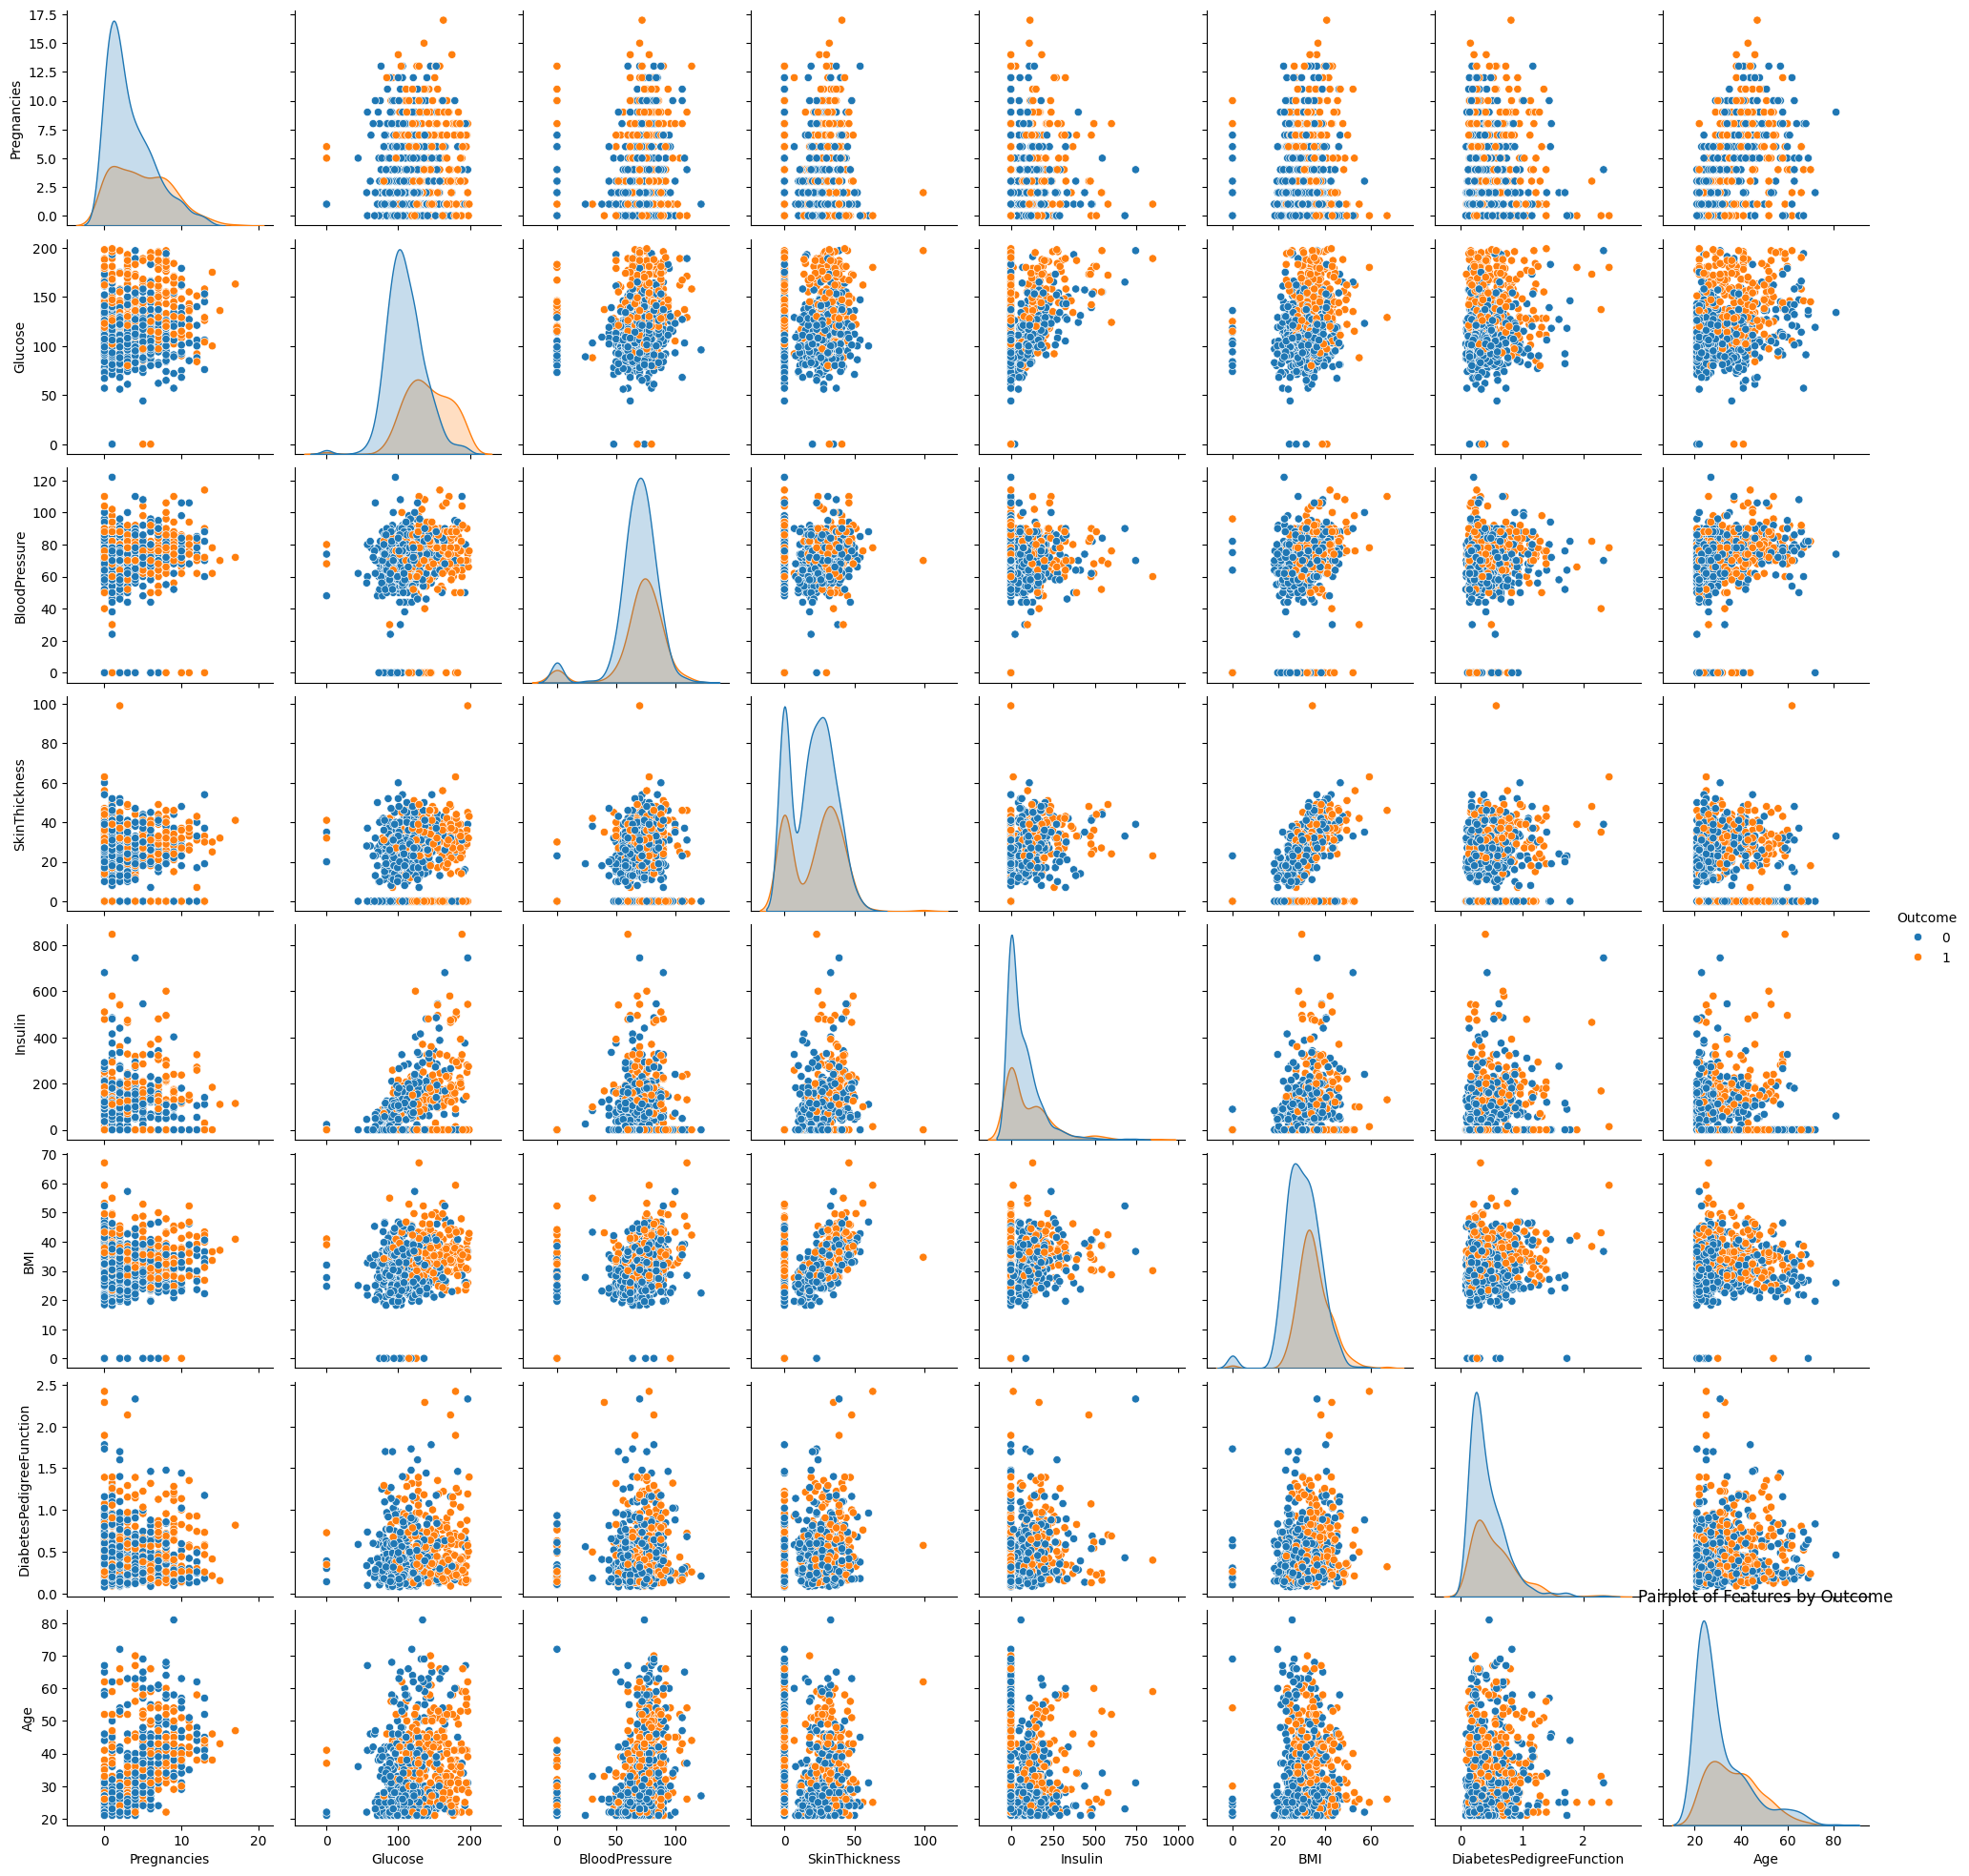

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.title('Pairplot of Features by Outcome')
plt.show()

## **Multivariate Analysis**

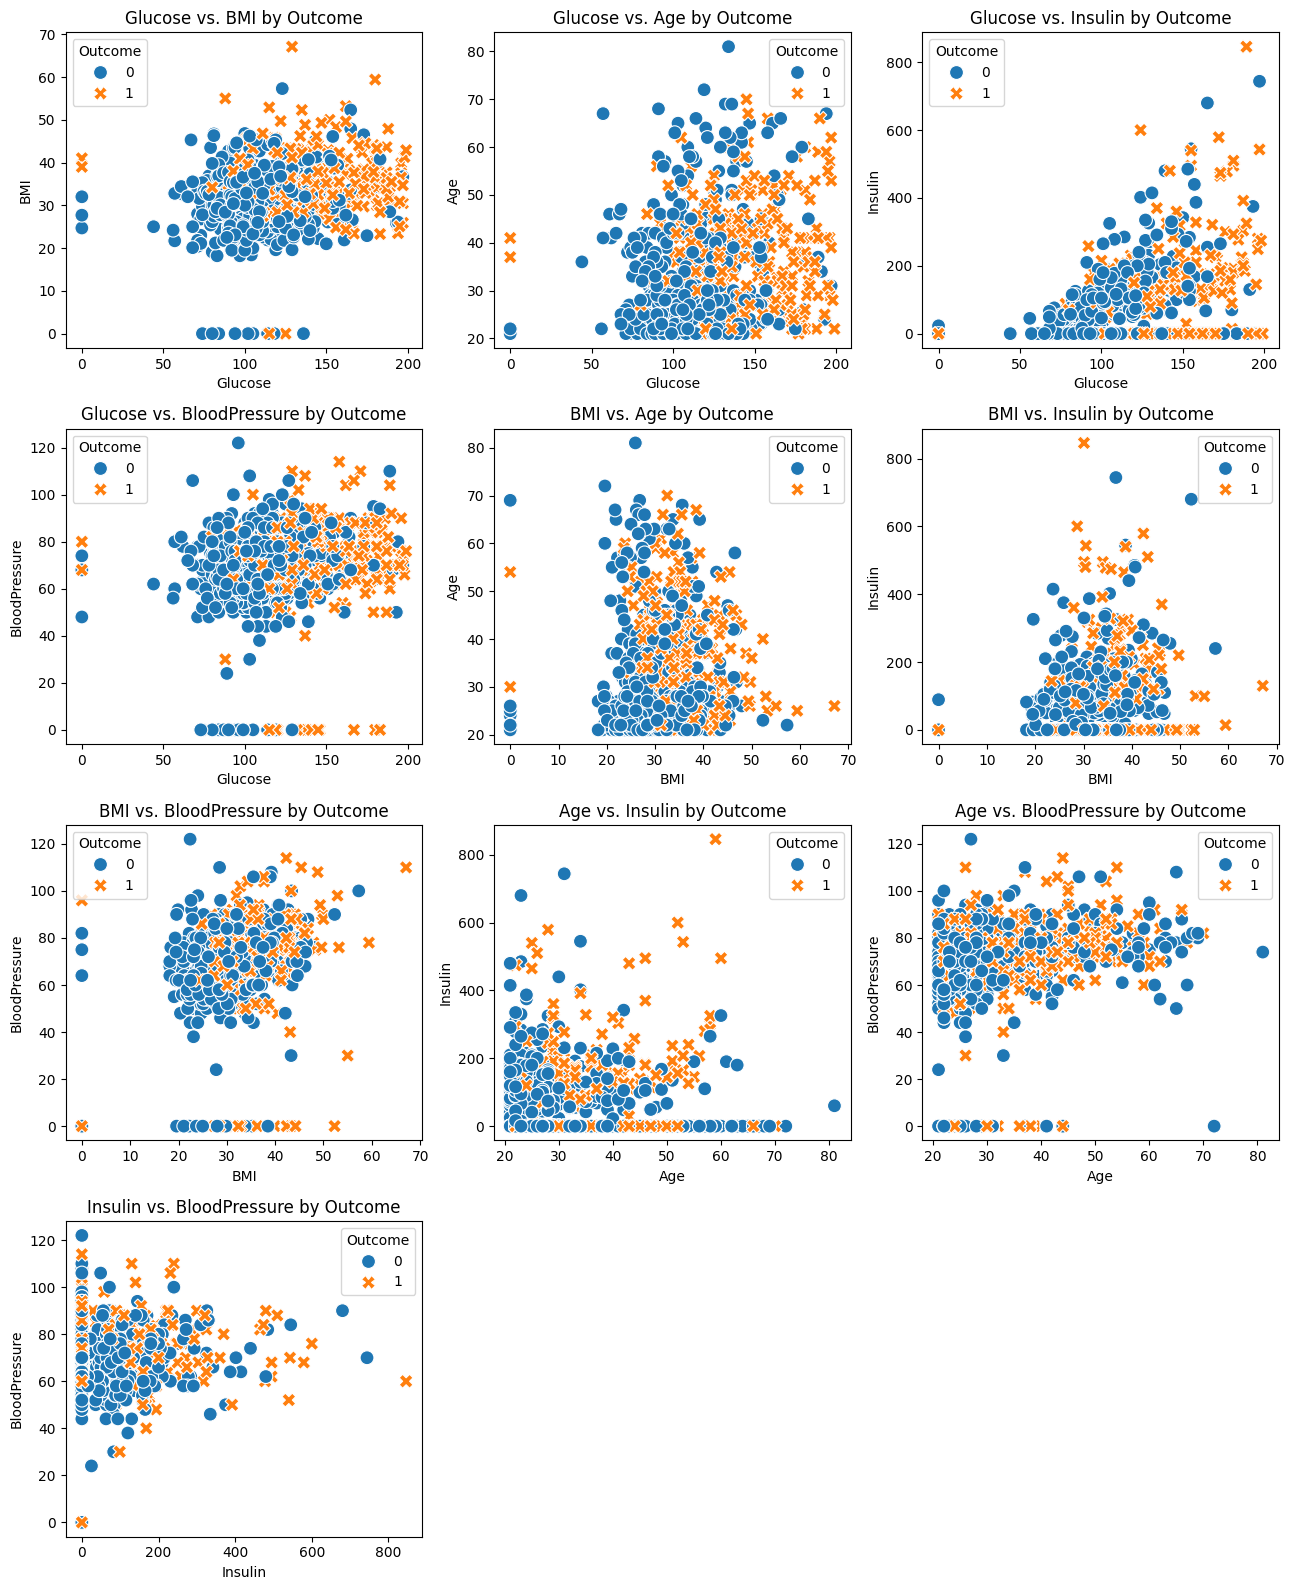

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Specify the feature columns to analyze
feature_columns = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

# Function to create scatter plots for each combination
def create_scatter_plots(data, features):
    num_plots = len(list(combinations(features, 2)))
    cols = 3
    rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(13, 4 * rows))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    plot_index = 0
    for x, y in combinations(features, 2):
        sns.scatterplot(data=data, x=x, y=y, hue='Outcome', style='Outcome', s=100, ax=axes[plot_index])
        axes[plot_index].set_title(f'{x} vs. {y} by Outcome')
        axes[plot_index].set_xlabel(x)
        axes[plot_index].set_ylabel(y)
        axes[plot_index].legend(title='Outcome')
        plot_index += 1

    # Remove any unused subplots
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Create scatter plots
create_scatter_plots(df, feature_columns)

**Observation**
- People with higher `Glucose` levels (over 100) are mostly those diagnosed with diabetes (Outcome = 1). As `BMI` increases, glucose levels also tend to rise, especially in the diabetic group. Normal glucose levels are more spread out across different `BMI` values, while those with diabetes cluster at higher glucose levels.

- Diabetic individuals usually have higher `Glucose` levels and are found across a wider age range, particularly between 40 and 80 years. This suggests that both glucose and `Age` are important in predicting diabetes, while non-diabetic individuals typically have lower glucose levels across various ages.

- There is a positive link between `Glucose` and `Insulin` levels, with both being higher in people with diabetes. Many diabetics have high glucose with varied insulin levels, showing that glucose is a strong diabetes indicator, but insulin levels can differ widely among diabetics.

- No strong connection exists between `Glucose` and `BloodPressure`, but people with diabetes tend to have higher glucose regardless of their blood pressure. Both groups have similar blood pressure distributions, with no clear separation between them.

- The diabetic group shows a wide range of `BMI` and `Age`, indicating that diabetes can affect people of all ages and body sizes. There isn’t a strong pattern linking `BMI` and `Age`, though younger individuals tend to have a broader range of `BMI` values.

- Higher `Insulin` levels are more common in people with diabetes, but these individuals show a wide variety of `BMI` values at high insulin levels. There isn’t a clear relationship between `BMI` and insulin, but those with high insulin levels are more likely to have diabetes.

- People with higher `BMI` levels (over 25) tend to have a broad range of `BloodPressure` readings, but there is no clear distinction between diabetic (Outcome = 1) and non-diabetic individuals (Outcome = 0) based solely on these features. Both groups overlap significantly in this regard.

- Diabetic individuals (Outcome = 1) tend to have higher `Insulin` levels across a wide age range, especially between 40 and 80 years, whereas non-diabetic individuals (Outcome = 0) generally have lower insulin levels, indicating that insulin and `Age` are key factors in distinguishing diabetes.

- A positive correlation exists between `Insulin` and `BloodPressure`, with diabetics showing a higher variance in both factors. However, blood pressure alone does not clearly differentiate the two outcomes, as both diabetic and non-diabetic groups have overlapping blood pressure ranges at various insulin levels.

- `Age` and `BloodPressure` show no strong correlation, and both groups have a similar distribution across these features. Diabetic and non-diabetic individuals alike exhibit a wide range of blood pressure values, meaning neither age nor blood pressure alone serves as a decisive factor for distinguishing outcomes.

## **Model Building**

## **1. Logistic Regression**

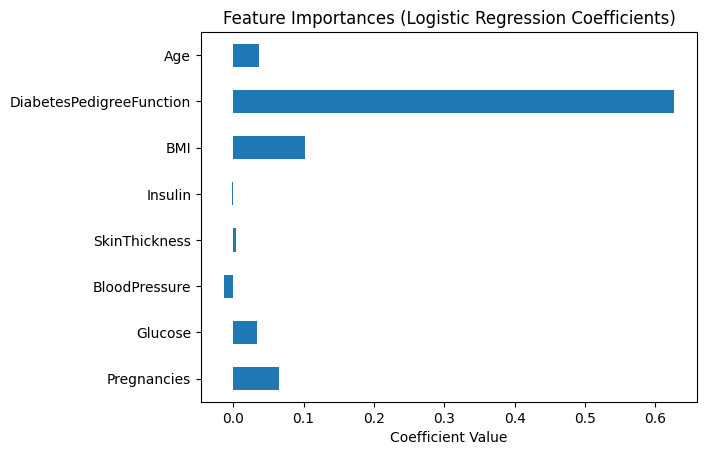

,0
Pregnancies,0.064544
Glucose,0.034092
BloodPressure,-0.013873
SkinThickness,0.003283
Insulin,-0.001803
BMI,0.102617
DiabetesPedigreeFunction,0.627304
Age,0.037062


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = LogisticRegression(max_iter=1000)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.66
Accuracy with top 2 features: 0.69
Accuracy with top 3 features: 0.68
Accuracy with top 4 features: 0.64
Accuracy with top 5 features: 0.75
Accuracy with top 6 features: 0.77
Accuracy with top 7 features: 0.76
Accuracy with top 8 features: 0.75

Best accuracy: 0.77 using top 6 features:
['DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'Age', 'Glucose', 'SkinThickness']


### **Logistic Regression with scaled data**

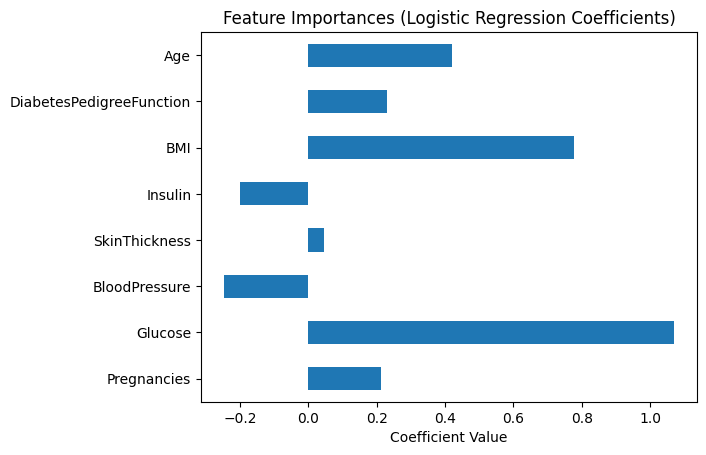

Accuracy with top 1 features: 0.75
Accuracy with top 2 features: 0.77
Accuracy with top 3 features: 0.75
Accuracy with top 4 features: 0.77
Accuracy with top 5 features: 0.75
Accuracy with top 6 features: 0.76
Accuracy with top 7 features: 0.76
Accuracy with top 8 features: 0.75

Best accuracy: 0.77 using top 4 features:
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Convert selected features to integer indices
    selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

    # Train the model with the selected features
    model_best = LogisticRegression(max_iter=1000)
    model_best.fit(X_train_scaled[:, selected_indices], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, selected_indices])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

## **2. SVC**

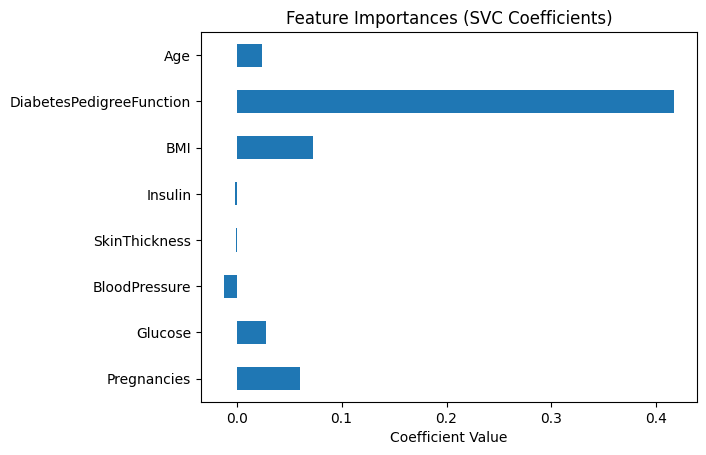

,0
Pregnancies,0.060116
Glucose,0.027939
BloodPressure,-0.012503
SkinThickness,-0.000992
Insulin,-0.001290
BMI,0.072873
DiabetesPedigreeFunction,0.417160
Age,0.024115


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVC model
model = SVC(kernel='linear')  # Using a linear kernel for interpretability
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (SVC Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = SVC(kernel='linear')  # Using a linear kernel for consistency
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.64
Accuracy with top 2 features: 0.66
Accuracy with top 3 features: 0.70
Accuracy with top 4 features: 0.77
Accuracy with top 5 features: 0.76
Accuracy with top 6 features: 0.78
Accuracy with top 7 features: 0.76
Accuracy with top 8 features: 0.75

Best accuracy: 0.78 using top 6 features:
['DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'Glucose', 'Age', 'SkinThickness']


## **SVC with scaled data**

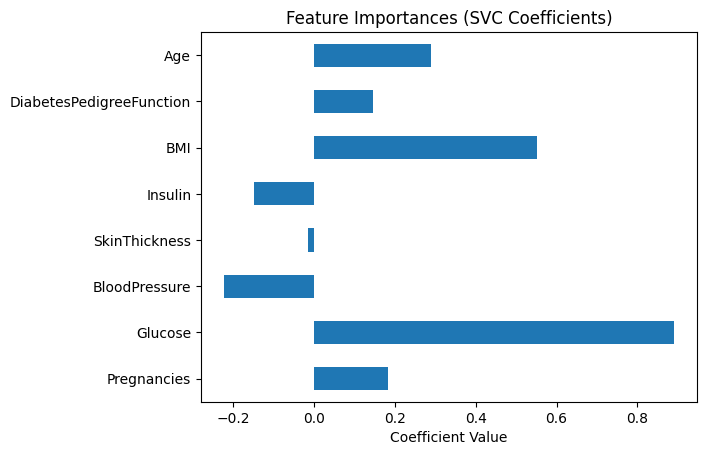

Accuracy with top 1 features: 0.75
Accuracy with top 2 features: 0.77
Accuracy with top 3 features: 0.77
Accuracy with top 4 features: 0.75
Accuracy with top 5 features: 0.78
Accuracy with top 6 features: 0.79
Accuracy with top 7 features: 0.76
Accuracy with top 8 features: 0.76

Best accuracy: 0.79 using top 6 features:
['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'SkinThickness']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVC model
model = SVC(kernel='linear')  # Using a linear kernel for interpretability
model.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (SVC Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Convert selected features to integer indices
    selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

    # Train the model with the selected features
    model_best = SVC(kernel='linear')  # Using a linear kernel for consistency
    model_best.fit(X_train_scaled[:, selected_indices], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, selected_indices])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

## **DTC**

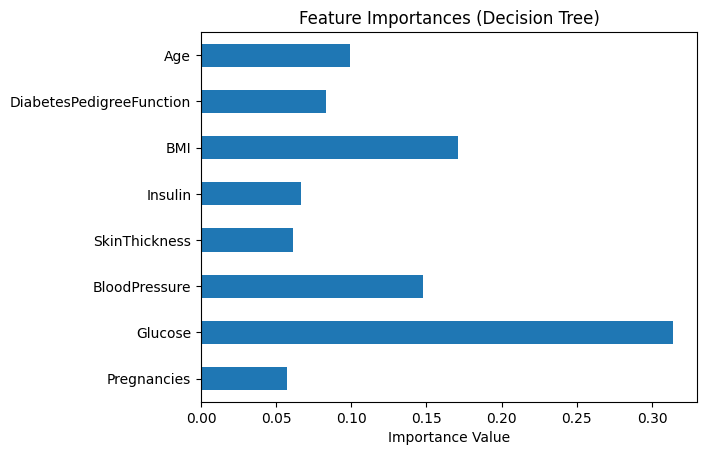

,0
Pregnancies,0.057482
Glucose,0.314225
BloodPressure,0.147679
SkinThickness,0.061164
Insulin,0.066253
BMI,0.170700
DiabetesPedigreeFunction,0.083282
Age,0.099215


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = DecisionTreeClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.67
Accuracy with top 2 features: 0.73
Accuracy with top 3 features: 0.67
Accuracy with top 4 features: 0.69
Accuracy with top 5 features: 0.69
Accuracy with top 6 features: 0.74
Accuracy with top 7 features: 0.74
Accuracy with top 8 features: 0.71

Best accuracy: 0.74 using top 6 features:
['Glucose', 'BMI', 'BloodPressure', 'Age', 'DiabetesPedigreeFunction', 'Insulin']


## **RFC**

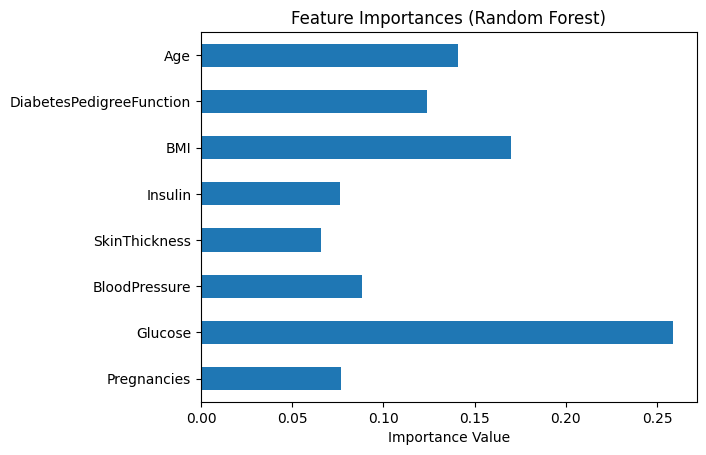

,0
Pregnancies,0.076551
Glucose,0.258864
BloodPressure,0.088134
SkinThickness,0.065646
Insulin,0.076122
BMI,0.169984
DiabetesPedigreeFunction,0.123768
Age,0.140931


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = RandomForestClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.68
Accuracy with top 2 features: 0.74
Accuracy with top 3 features: 0.73
Accuracy with top 4 features: 0.77
Accuracy with top 5 features: 0.78
Accuracy with top 6 features: 0.77
Accuracy with top 7 features: 0.75
Accuracy with top 8 features: 0.74

Best accuracy: 0.78 using top 5 features:
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure']


## **KNN**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since KNN does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = KNeighborsClassifier()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.59
Accuracy with top 2 features: 0.72
Accuracy with top 3 features: 0.75
Accuracy with top 4 features: 0.72
Accuracy with top 5 features: 0.73
Accuracy with top 6 features: 0.71
Accuracy with top 7 features: 0.71
Accuracy with top 8 features: 0.66

Best accuracy: 0.75 using top 3 features:
['Pregnancies', 'Glucose', 'BloodPressure']


## **Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0
best_model = None

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = GaussianNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features
        best_model = model_best  # Save the best model

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

# Save the best model
joblib.dump(best_model, 'best_naive_bayes_model.pkl')
print("Model saved as 'best_naive_bayes_model.pkl'")

Accuracy with top 1 features: 0.69
Accuracy with top 2 features: 0.78
Accuracy with top 3 features: 0.79
Accuracy with top 4 features: 0.77
Accuracy with top 5 features: 0.79
Accuracy with top 6 features: 0.79
Accuracy with top 7 features: 0.81
Accuracy with top 8 features: 0.77

Best accuracy: 0.81 using top 7 features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
Model saved as 'best_naive_bayes_model.pkl'


### **2. Bernoulli**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Bernoulli Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = BernoulliNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

### **3. Multinomial**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Multinomial Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = MultinomialNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.64
Accuracy with top 2 features: 0.66
Accuracy with top 3 features: 0.71
Accuracy with top 4 features: 0.68
Accuracy with top 5 features: 0.67
Accuracy with top 6 features: 0.66
Accuracy with top 7 features: 0.66
Accuracy with top 8 features: 0.66

Best accuracy: 0.71 using top 3 features:
['Pregnancies', 'Glucose', 'BloodPressure']


## **Gradient boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = GradientBoostingClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.73
Accuracy with top 2 features: 0.77
Accuracy with top 3 features: 0.73
Accuracy with top 4 features: 0.73
Accuracy with top 5 features: 0.75
Accuracy with top 6 features: 0.73
Accuracy with top 7 features: 0.75
Accuracy with top 8 features: 0.74

Best accuracy: 0.77 using top 2 features:
['Glucose', 'BMI']


## **Gradient Boost with scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = GradientBoostingClassifier(random_state=42)
    model_best.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.66
Accuracy with top 2 features: 0.73
Accuracy with top 3 features: 0.75
Accuracy with top 4 features: 0.74
Accuracy with top 5 features: 0.75
Accuracy with top 6 features: 0.76
Accuracy with top 7 features: 0.75
Accuracy with top 8 features: 0.74

Best accuracy: 0.76 using top 6 features:
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure']


## **XGBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.73
Accuracy with top 2 features: 0.67
Accuracy with top 3 features: 0.68
Accuracy with top 4 features: 0.71
Accuracy with top 5 features: 0.74
Accuracy with top 6 features: 0.75
Accuracy with top 7 features: 0.70
Accuracy with top 8 features: 0.71

Best accuracy: 0.75 using top 6 features:
['Glucose', 'Age', 'BMI', 'Insulin', 'DiabetesPedigreeFunction', 'Pregnancies']


## **XGBoost with scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_best.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.67
Accuracy with top 2 features: 0.69
Accuracy with top 3 features: 0.73
Accuracy with top 4 features: 0.68
Accuracy with top 5 features: 0.64
Accuracy with top 6 features: 0.66
Accuracy with top 7 features: 0.68
Accuracy with top 8 features: 0.71

Best accuracy: 0.73 using top 3 features:
['Glucose', 'Age', 'BMI']


##  

## **Ada Boost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create a base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    ada_model.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.68
Accuracy with top 2 features: 0.64
Accuracy with top 3 features: 0.65
Accuracy with top 4 features: 0.66
Accuracy with top 5 features: 0.64
Accuracy with top 6 features: 0.68
Accuracy with top 7 features: 0.69
Accuracy with top 8 features: 0.75

Best accuracy: 0.75 using top 8 features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## **AdaBoost with Scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create a base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    ada_model.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.68
Accuracy with top 2 features: 0.64
Accuracy with top 3 features: 0.65
Accuracy with top 4 features: 0.66
Accuracy with top 5 features: 0.64
Accuracy with top 6 features: 0.69
Accuracy with top 7 features: 0.69
Accuracy with top 8 features: 0.75

Best accuracy: 0.75 using top 8 features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## **Ada Boost with different base models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best model, accuracy, and corresponding features
best_accuracy = 0
best_model = None
best_features = None
best_n_features = 0

# List of base models to evaluate
base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate accuracy for different base models and different numbers of top features
for model_name, base_model in base_models.items():
    ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

    for n_features in range(1, X.shape[1] + 1):
        selected_features = X.columns[:n_features]

        # Train the model with the selected features
        ada_model.fit(X_train[selected_features], y_train)

        # Make predictions on the test set
        y_pred = ada_model.predict(X_test[selected_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy with {model_name} using top {n_features} features: {accuracy:.2f}')

        # Update best accuracy and features if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
            best_features = selected_features
            best_n_features = n_features

# Final results
print(f'\nBest model: {best_model} with accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with Decision Tree using top 1 features: 0.68
Accuracy with Decision Tree using top 2 features: 0.64
Accuracy with Decision Tree using top 3 features: 0.65
Accuracy with Decision Tree using top 4 features: 0.66
Accuracy with Decision Tree using top 5 features: 0.64
Accuracy with Decision Tree using top 6 features: 0.68
Accuracy with Decision Tree using top 7 features: 0.69
Accuracy with Decision Tree using top 8 features: 0.75
Accuracy with Random Forest using top 1 features: 0.68
Accuracy with Random Forest using top 2 features: 0.68
Accuracy with Random Forest using top 3 features: 0.75
Accuracy with Random Forest using top 4 features: 0.73
Accuracy with Random Forest using top 5 features: 0.70
Accuracy with Random Forest using top 6 features: 0.75
Accuracy with Random Forest using top 7 features: 0.75
Accuracy with Random Forest using top 8 features: 0.75
Accuracy with Logistic Regression using top 1 features: 0.69
Accuracy with Logistic Regression using top 2 features: 0.7

## **AdaBoost with different models and scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best model, accuracy, and corresponding features
best_accuracy = 0
best_model = None
best_features = None
best_n_features = 0

# List of base models to evaluate
# Base models to evaluate
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}


# Evaluate accuracy for different base models and different numbers of top features
for model_name, base_model in base_models.items():
    ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

    for n_features in range(1, X.shape[1] + 1):
        selected_features = X.columns[:n_features]

        # Train the model with the selected features
        ada_model.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

        # Make predictions on the test set
        y_pred = ada_model.predict(X_test_scaled[:, :n_features])  # Use scaled features

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy with {model_name} using top {n_features} features: {accuracy:.2f}')

        # Update best accuracy and features if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
            best_features = selected_features
            best_n_features = n_features

# Final results
print(f'\nBest model: {best_model} with accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with Logistic Regression using top 1 features: 0.69
Accuracy with Logistic Regression using top 2 features: 0.78
Accuracy with Logistic Regression using top 3 features: 0.78
Accuracy with Logistic Regression using top 4 features: 0.79
Accuracy with Logistic Regression using top 5 features: 0.77
Accuracy with Logistic Regression using top 6 features: 0.77
Accuracy with Logistic Regression using top 7 features: 0.78
Accuracy with Logistic Regression using top 8 features: 0.73
Accuracy with Decision Tree using top 1 features: 0.68
Accuracy with Decision Tree using top 2 features: 0.64
Accuracy with Decision Tree using top 3 features: 0.65
Accuracy with Decision Tree using top 4 features: 0.66
Accuracy with Decision Tree using top 5 features: 0.64
Accuracy with Decision Tree using top 6 features: 0.69
Accuracy with Decision Tree using top 7 features: 0.69
Accuracy with Decision Tree using top 8 features: 0.75
Accuracy with Random Forest using top 1 features: 0.68
Accuracy with Ran

#         

# **Neural Network**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Set a learning rate
learning_rate = 0.001  # You can adjust this value

# Compile the model with the learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=32, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Save the model
#model.save('diabetes_model.h5')

# To load the model later
# loaded_model = keras.models.load_model('diabetes_model.h5')

Epoch 1/32
31/31 [==============================] - 1s 11ms/step - loss: 0.7018 - accuracy: 0.5580 - val_loss: 0.6904 - val_accuracy: 0.6098
Epoch 2/32
31/31 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.6619 - val_loss: 0.6509 - val_accuracy: 0.6504
Epoch 3/32
31/31 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.6945 - val_loss: 0.6257 - val_accuracy: 0.6748
Epoch 4/32
31/31 [==============================] - 0s 4ms/step - loss: 0.5734 - accuracy: 0.7169 - val_loss: 0.6051 - val_accuracy: 0.6748
Epoch 5/32
31/31 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.7332 - val_loss: 0.5865 - val_accuracy: 0.6829
Epoch 6/32
31/31 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7454 - val_loss: 0.5730 - val_accuracy: 0.6911
Epoch 7/32
31/31 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7495 - val_loss: 0.5603 - val_accuracy: 0.6992
Epoch 8/32
31/31 [=

#         

# **Conclusion**
In my analysis of the diabetes dataset, I found that the Gaussian Naive Bayes model achieves an impressive accuracy of **81%**. The key features contributing to this performance are **Pregnancies**, **Glucose**, **Blood Pressure**, **Skin Thickness**, **Insulin**, **BMI**, and **Diabetes Pedigree Function**.

You can access our app to explore these insights further: [Diabetes Predictor App](https://diabetes--predictor.streamlit.app/#ce92573c).